In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Решим задачу регрессии
* Сравним результаты численного решения с аналитическим

$$ y(x) = x0*w0 + x1*w1 $$

In [8]:
# результат работы модели -- это скалярное произведение весов w на значения признаков x
def linear_prediction(X, w):
    return X.dot(w)

In [9]:
def loss(X, y, w):
    y_pred = linear_prediction(X, w)
    mse = ((y_pred - y) ** 2).mean()
    return mse

In [10]:
#необходимо реализовать численную оптимизацию функции стоиомости (градиентный спуск)
#на вход подается матрица признаков Х, целевая переменная y, веса и скорость обучения lr (параметр альфа)
#функция стоимости -- MSE
def optim(X, y, w, lr=0.001, num_iterations=1000):
    for i in range(num_iterations):
        gradient = X.T.dot(X.dot(w) - y) / len(y)
        w -= lr * gradient
    return w

In [11]:
x = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,
              6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176, 22.203, 5.2524, 6.5894,
              9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,
              11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959,
              7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292, 5.1884,
              6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369])

y = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987, 3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,
              3.6518, 5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692, 24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,
              4.1164, 3.3928, 10.117, 5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043, 1.0179, 6.7504, 1.8396, 4.2885, 4.9981,
              1.4233, -1.4211, 2.4756, 4.6042, 3.9624, 5.4141, 5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173, 20.992, 6.6799, 4.0259,
              1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526, 2.0576, 0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695, 0.152, 2.8214,
              1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705])

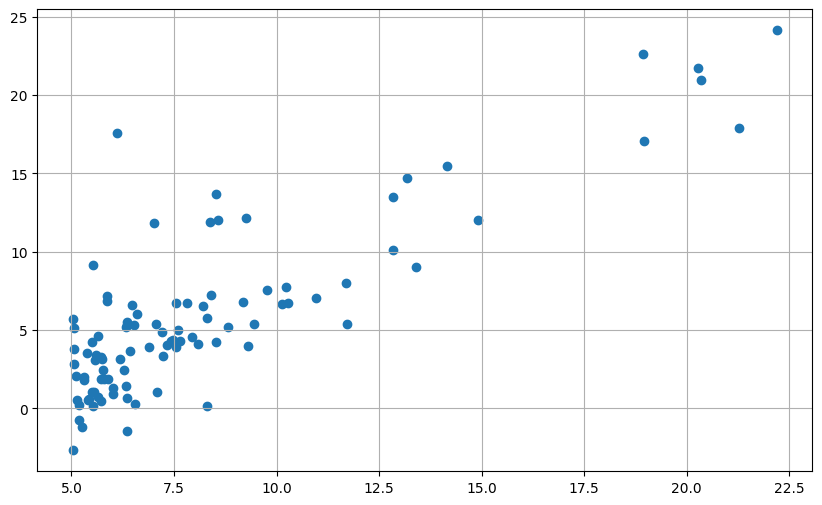

In [20]:
plt.figure(figsize=(10,6))
plt.grid()
plt.scatter(x,y)
plt.show()

In [ ]:
#найдем аналитическое решение
def analytical(X):
    W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return W

In [17]:
# Добавим столбец с единицами для учета свободного члена (intercept)
X = np.c_[np.ones(x.shape[0]), x]

# Инициализируем веса
w = np.zeros(X.shape[1])

# Обучим модель с использованием градиентного спуска
w_optimized = optim(X, y, w, lr=0.01, num_iterations=10000)

# Вычислим функцию потерь на обучающем наборе данных
train_loss = loss(X, y, w_optimized)
w_analytical = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print("Аналитически оптимальные веса:", w_analytical)
print("Оптимизированные веса:", w_optimized)
print("Функция потерь на обучающем наборе данных (MSE):", train_loss)

Аналитически оптимальные веса: [-3.89578088  1.19303364]
Оптимизированные веса: [-3.89578082  1.19303364]
Функция потерь на обучающем наборе данных (MSE): 8.953942751950358


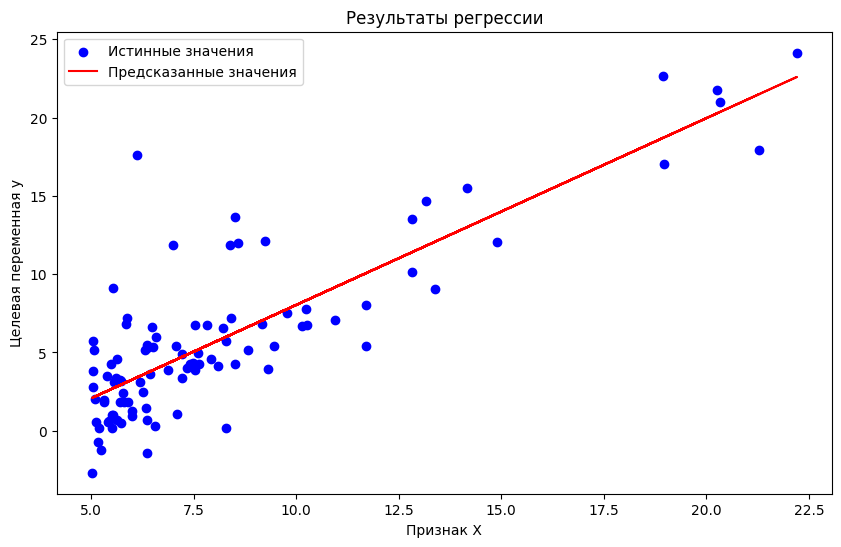

In [18]:
import matplotlib.pyplot as plt


y_true = y
y_pred = X.dot(w_analytical)  # Предсказанные значения модели с аналитическими весами

# Создадим график для визуализации
plt.figure(figsize=(10, 6))
plt.scatter(x, y_true, label='Истинные значения', color='blue')
plt.plot(x, y_pred, label='Предсказанные значения', color='red')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.title('Результаты регрессии')
plt.legend()
plt.show()

# Решить задачу регрессии для прогнозирования ...
Использовать линейную регрессию без регуляризации, с регуляризацией Тихонова, и лассо регуляризацией, сравнить результаты

In [16]:
from sklearn.datasets import load_boston


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


<Axes: >

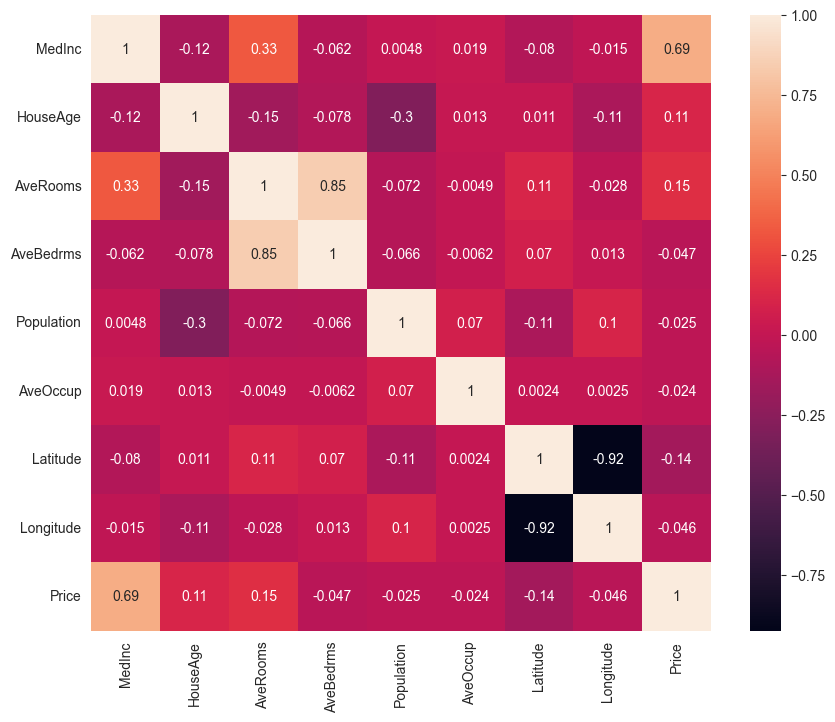

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

#data
california = fetch_california_housing()
california_df=pd.DataFrame(california.data,columns=california.feature_names)
#target variable
california_df['Price']=california.target
#preview
california_df.head()

#Exploration
plt.figure(figsize = (10, 8))
sns.heatmap(california_df.corr(), annot = True)

In [4]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


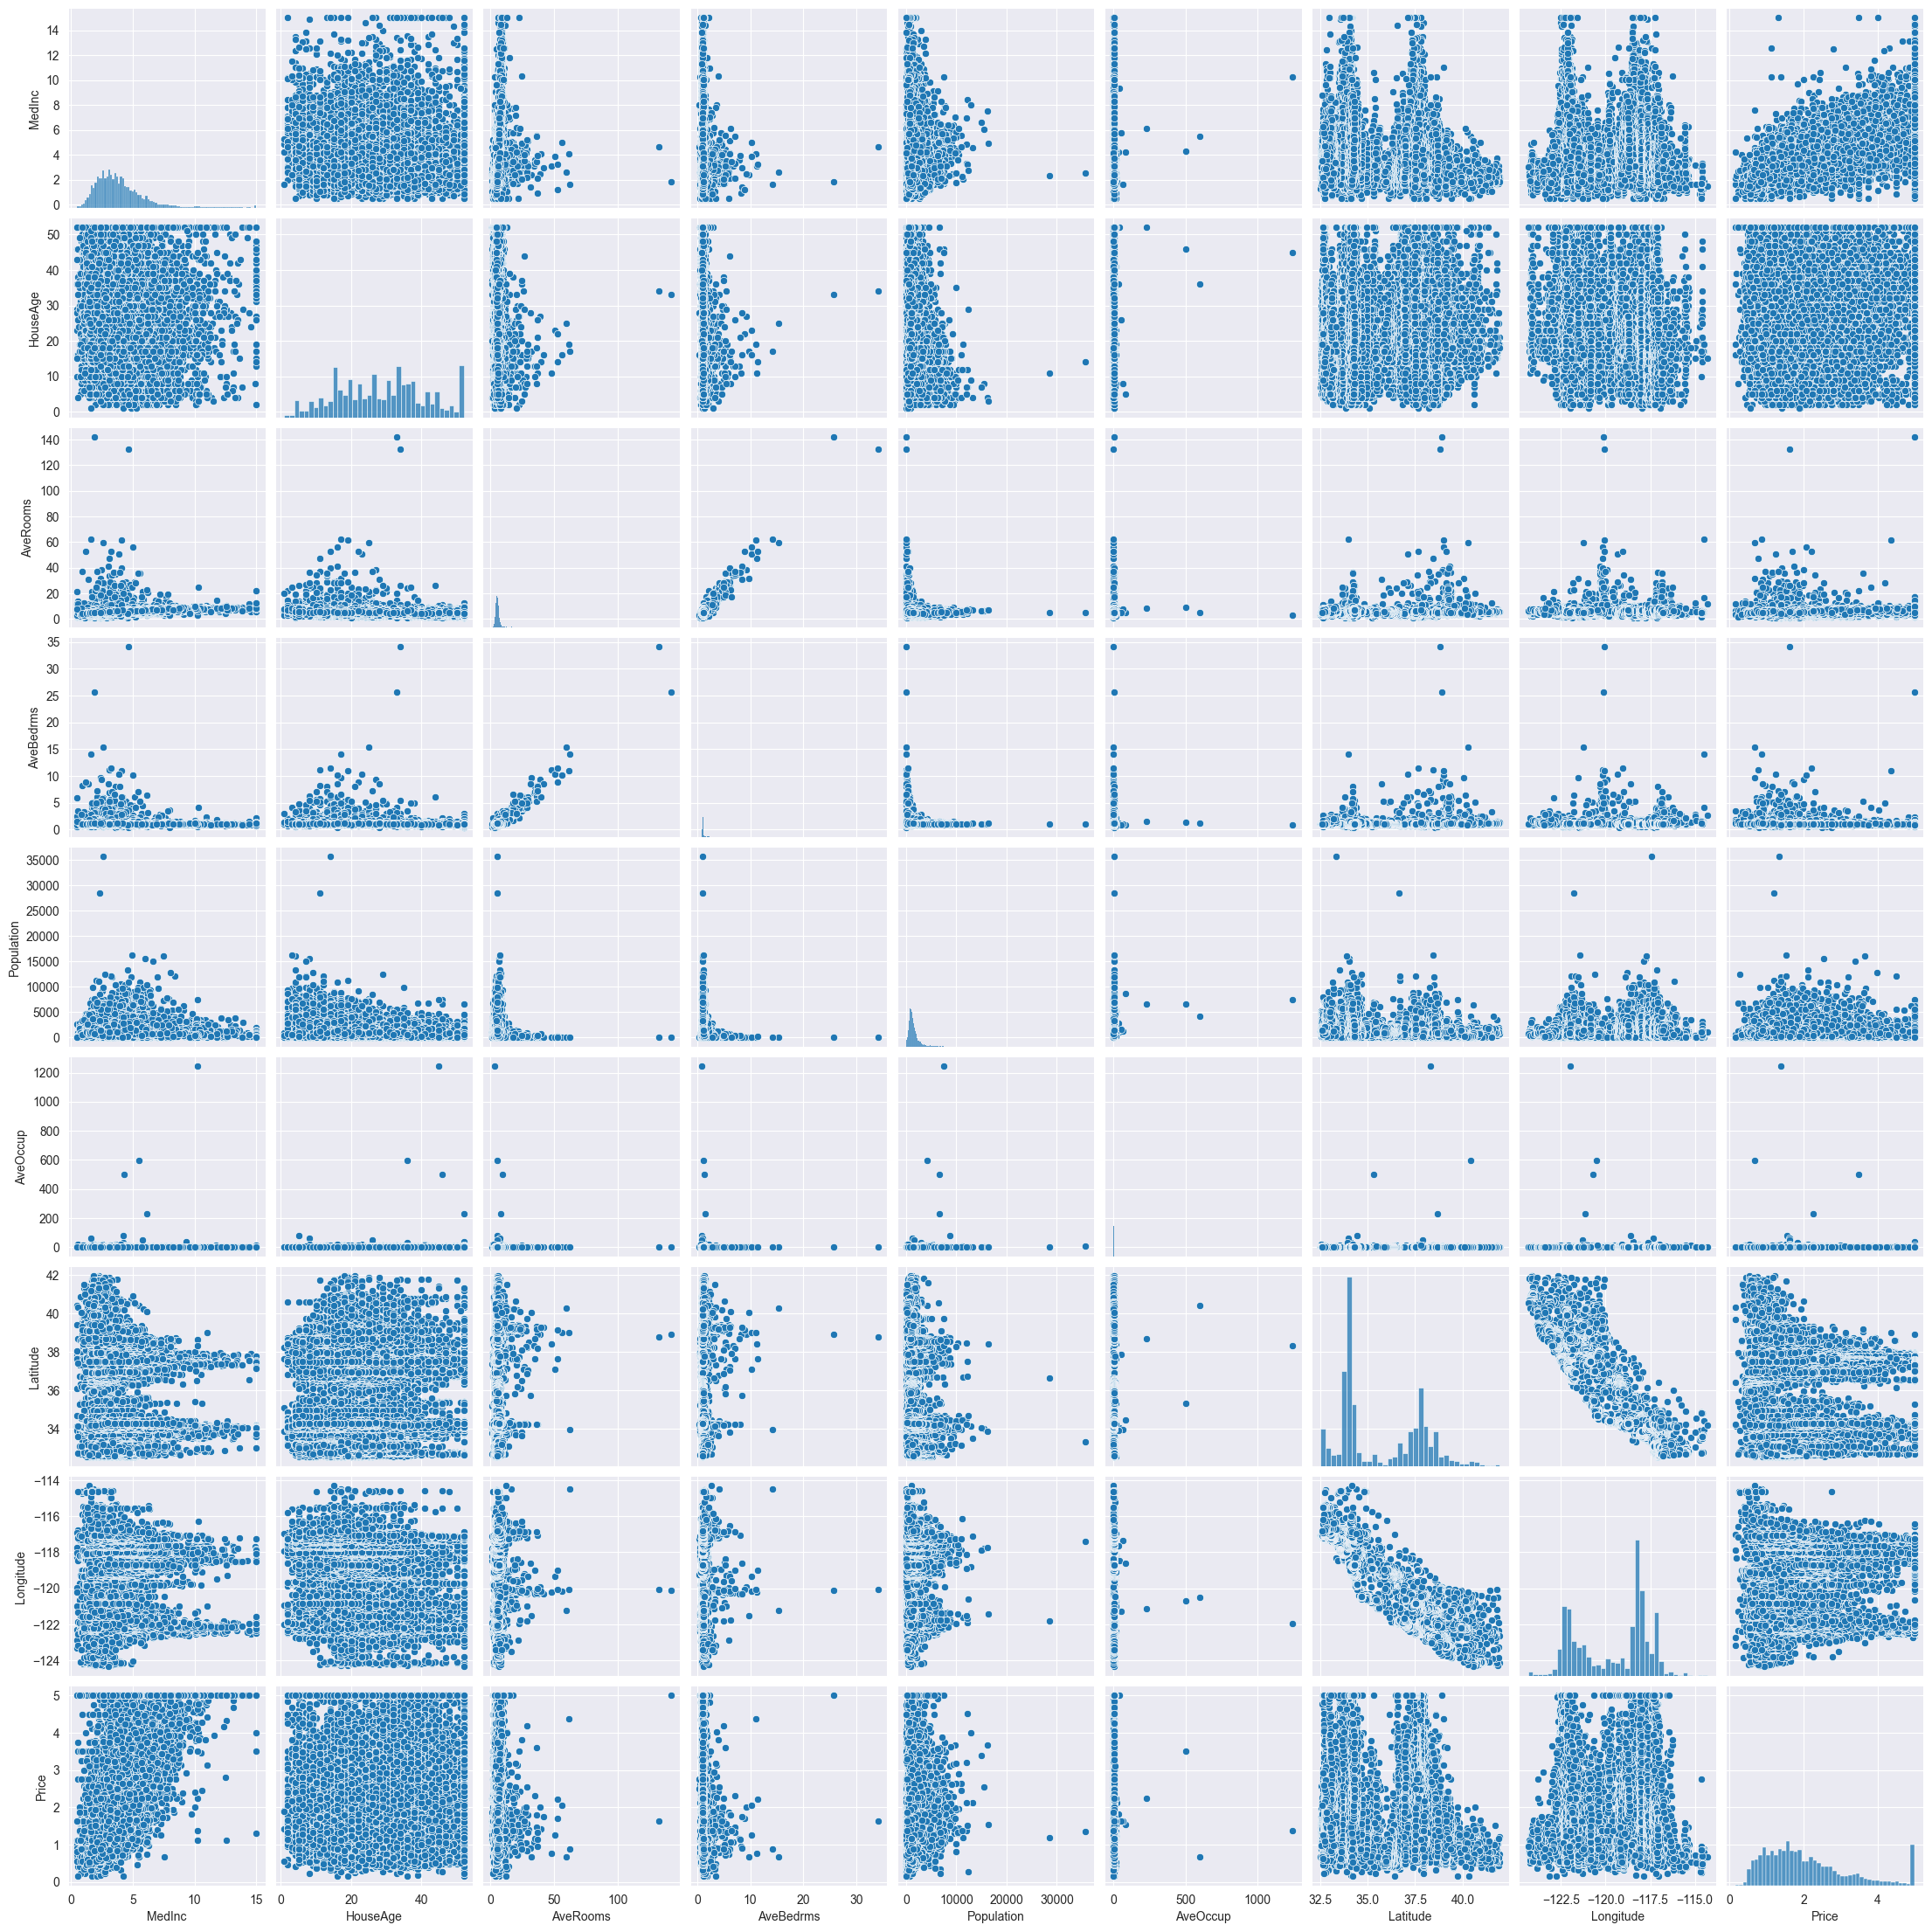

In [2]:
sns.pairplot(california_df)

**Предобработка данных**

In [2]:
# Импорт необходимых библиотек и модулей
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

# Подготовка данных
housevalue = fch()  # Загрузка данных о недвижимости в Калифорнии
X = pd.DataFrame(housevalue.data)  # Создание датафрейма с признаками
y = housevalue.target  # Создание вектора целевых значений
X.columns = ["Медицина", "Возраст дома",
             "Кол-во комнат", "Кол-во спален", "Населенность",
             "Занятость", "Широта","Долгота"]

In [19]:
X.head()
X.shape

(20640, 8)

In [3]:
# Разделение данных на обучающий и тестовый наборы
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

# Восстановление индексов для обучающего и тестового наборов
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

**Использование обучающего набора данных на линейной регрессии**

In [4]:
# Использование линейной регрессии на обучающем наборе
from sklearn.metrics import mean_squared_error as MSE
reg = LinearRegression().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
print('MSE на обучающем наборе: {}'.format(MSE(yhat, Ytest)))
print('Точность на обучающем наборе: {}'.format(reg.score(Xtrain, Ytrain)))
print('Точность на тестовом наборе: {}'.format(reg.score(Xtest, Ytest)))


MSE на обучающем наборе: 0.5309012639324571
Точность на обучающем наборе: 0.6067440341875014
Точность на тестовом наборе: 0.6043668160178817


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Вычисляем прогнозы модели
y_pred = reg.predict(X)

# Вычисляем MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Вычисляем MAE
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Вычисляем R2
r2 = r2_score(y, y_pred)
print("Coefficient of Determination (R2):", r2)

Mean Squared Error (MSE): 0.5245669655570543
Mean Absolute Error (MAE): 0.5308720276540071
Coefficient of Determination (R2): 0.6060479536335759


**Использование Ridge регрессии**

In [7]:
# Использование Ridge регрессии
from sklearn.linear_model import RidgeCV
alphas = np.arange(1, 100, 1)
Ridge_ = RidgeCV(alphas=alphas, cv=5).fit(Xtrain, Ytrain)
print('Точность на обучающем наборе: {}'.format(Ridge_.score(Xtrain, Ytrain)))
print('Точность на тестовом наборе: {}'.format(Ridge_.score(Xtest, Ytest)))
print('Лучший параметр для Ridge: {}'.format(Ridge_.alpha_))

Точность на обучающем наборе: 0.6065484332609067
Точность на тестовом наборе: 0.6038138173821124
Лучший параметр для Ridge: 71


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Вычисляем прогнозы модели
y_pred = Ridge_.predict(X)

# Вычисляем MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Вычисляем MAE
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Вычисляем R2
r2 = r2_score(y, y_pred)
print("Coefficient of Determination (R2):", r2)

Mean Squared Error (MSE): 0.5249712809344014
Mean Absolute Error (MAE): 0.5316572512589985
Coefficient of Determination (R2): 0.605744311046944


**Lasso регрессия**

In [9]:
# Lasso регрессия
from sklearn.linear_model import LassoCV
alpharange = np.logspace(-10, -2, 200, base=10)
Lasso_ = LassoCV(alphas=alpharange, cv=5).fit(Xtrain, Ytrain)
print('Точность на обучающем наборе: {}'.format(Lasso_.score(Xtrain, Ytrain)))
print('Точность на тестовом наборе: {}'.format(Lasso_.score(Xtest, Ytest)))
print('Лучший параметр для Lasso: {}'.format(Lasso_.alpha_))

Точность на обучающем наборе: 0.6065834096654689
Точность на тестовом наборе: 0.6038982670571436
Лучший параметр для Lasso: 0.0020729217795953697


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Вычисляем прогнозы модели
y_pred = Lasso_.predict(X)

# Вычисляем MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Вычисляем MAE
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Вычисляем R2
r2 = r2_score(y, y_pred)
print("Coefficient of Determination (R2):", r2)

Mean Squared Error (MSE): 0.5249047942768585
Mean Absolute Error (MAE): 0.5315340216064888
Coefficient of Determination (R2): 0.6057942428126002


In [11]:
predicted_prices = reg.predict(Xtest)

Xtest["Predicted Price"] = predicted_prices

print(Xtest[["Медицина", "Возраст дома", "Кол-во комнат", "Кол-во спален", "Населенность", "Занятость", "Широта", "Долгота", "Predicted Price"]])

      Медицина  Возраст дома  Кол-во комнат  Кол-во спален  Населенность  \
0       1.7656          42.0       4.144703       1.031008        1581.0   
1       1.5281          29.0       5.095890       1.095890        1137.0   
2       4.1750          14.0       5.604699       1.045965        2823.0   
3       3.0278          52.0       5.172932       1.085714        1663.0   
4       4.5000          36.0       4.940447       0.982630        1306.0   
...        ...           ...            ...            ...           ...   
6187    4.7250          44.0       5.969945       0.975410         943.0   
6188    2.8500          38.0       5.089347       1.089347        1080.0   
6189    3.7857          39.0       5.663507       1.052133        1246.0   
6190    3.7500          38.0       5.275229       0.981651         259.0   
6191    1.9355          10.0       5.136555       1.105042        1262.0   

      Занятость  Широта  Долгота  Predicted Price  
0      4.085271   33.96  -118.28   

In [12]:
results_df = Xtest[["Медицина", "Возраст дома", "Кол-во комнат", "Кол-во спален", "Населенность", "Занятость", "Широта", "Долгота"]].copy()
results_df["Цена (REGR)"] = predicted_prices
results_df["Цена (Real)"] = Ytest
results_df.head(10)

,Медицина,Возраст дома,Кол-во комнат,Кол-во спален,Населенность,Занятость,Широта,Долгота,Цена (REGR),Цена (Real)
0,1.7656,42.0,4.144703,1.031008,1581.0,4.085271,33.96,-118.28,1.513849,0.967
1,1.5281,29.0,5.095890,1.095890,1137.0,3.115068,39.29,-121.68,0.465662,0.616
2,4.1750,14.0,5.604699,1.045965,2823.0,2.883555,37.14,-121.64,2.256773,2.298
3,3.0278,52.0,5.172932,1.085714,1663.0,2.500752,37.78,-122.49,2.313086,3.563
4,4.5000,36.0,4.940447,0.982630,1306.0,3.240695,33.95,-118.09,2.458239,1.666
5,4.4792,15.0,4.981627,1.036745,1527.0,4.007874,37.31,-121.81,2.459214,2.125
6,2.6544,12.0,5.958333,1.291667,517.0,2.154167,38.06,-120.40,0.779784,1.281
7,3.5838,22.0,3.943856,1.048199,2980.0,1.578390,37.95,-122.53,2.309519,2.713
8,3.3068,50.0,4.622291,1.009288,1000.0,3.095975,34.18,-118.14,2.056962,1.544
9,2.0893,41.0,3.369565,0.942029,349.0,2.528986,34.06,-117.65,1.367783,1.125


In [13]:
from sklearn.ensemble import RandomForestRegressor
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
model_forest = RandomForestRegressor()
print('Start training model')
model_forest.fit(Xtrain,Ytrain)
print('Start predicting model')
Ypred=model_forest.predict(Xtest)

Start training model
Start predicting model


In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Вычисляем прогнозы модели
y_pred = model_forest.predict(X)

# Вычисляем MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Вычисляем MAE
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Вычисляем R2
r2 = r2_score(y, y_pred)
print("Coefficient of Determination (R2):", r2)

Mean Squared Error (MSE): 0.10543171928302458
Mean Absolute Error (MAE): 0.18841562820251972
Coefficient of Determination (R2): 0.9208203255434307


**Далее**
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("Datasets/bikes_rent.csv")
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


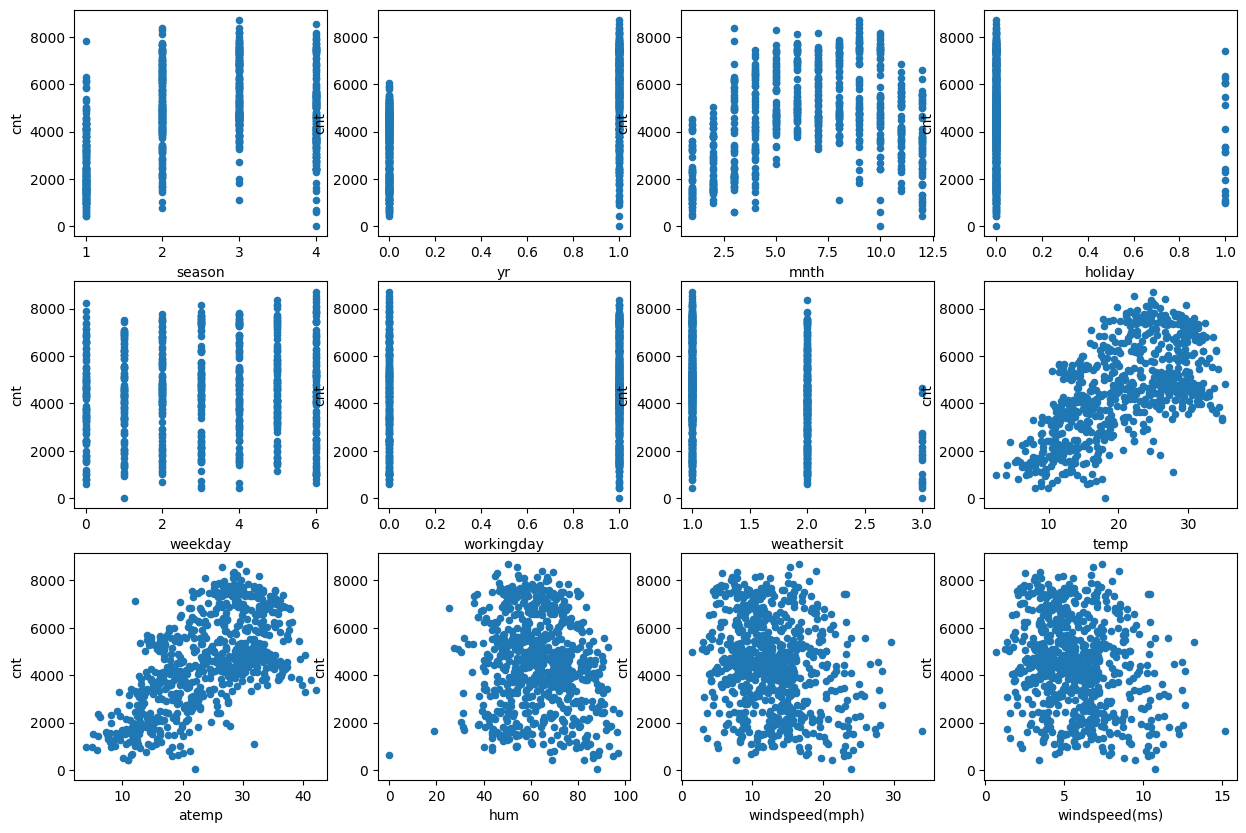

In [2]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

In [2]:
df.iloc[:, 0:12].corrwith(df["cnt"])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [3]:
df.iloc[:, 7:13].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


<Axes: >

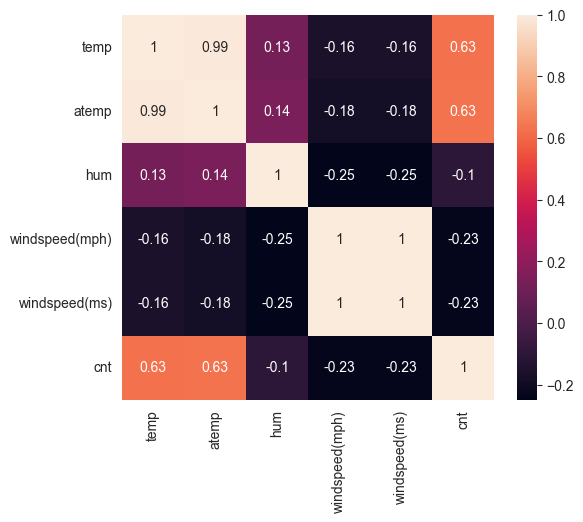

In [4]:
plt.figure(figsize = (6, 5))
sns.heatmap(df.iloc[:, 7:13].corr(), annot = True)

In [5]:
print("Binary: ", df["workingday"].mean(), df["yr"].mean(), df["holiday"].mean())
df.mean()

Binary:  0.6839945280437757 0.5006839945280438 0.028727770177838577


season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [6]:
from sklearn.preprocessing import scale
X = scale(df[df.columns[:-1]])
y = df["cnt"]

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X, y)
print("Coeff: \n", model.coef_, "\n")
print("Feature:    Weight:")

for feature, coeff in zip(df.columns, model.coef_.T):
    print(feature, coeff)
    
r_sq = model.score(X, y)
print("coeff of determination: ", r_sq)


# Вычисляем R2
r2 = r2_score(y, y_pred)
print("Coefficient of Determination (R2):", r2)

Coeff: 
 [ 5.70866585e+02  1.02196165e+03 -1.41302611e+02 -8.67624590e+01
  1.37227384e+02  5.63897522e+01 -3.30230380e+02  3.67453761e+02
  5.85577283e+02 -1.45610126e+02  1.24579000e+13 -1.24579000e+13] 

Feature:    Weight:
season 570.8665851622761
yr 1021.9616465383979
mnth -141.302610593395
holiday -86.76245904006696
weekday 137.2273838388995
workingday 56.38975222972957
weathersit -330.2303800172632
temp 367.4537605538607
atemp 585.5772832170196
hum -145.61012596570754
windspeed(mph) 12457899973674.256
windspeed(ms) -12457899973872.715
coeff of determination:  0.8005756382271576


NameError: name 'y_pred' is not defined

In [8]:
y_pred = model.predict(X)
print("Predicted response: ", y_pred, sep="\n")

Predicted response: 
[ 1.92197690e+03  1.40481308e+03  1.53926276e+03  1.76174693e+03
  2.03492368e+03  2.21949400e+03  1.38095740e+03  8.09399734e+02
  7.26022481e+02  1.29830390e+03  9.90528520e+02  1.16829080e+03
  1.37848069e+03  1.93708554e+03  1.59310275e+03  1.63897242e+03
  1.96367450e+02  1.00195759e+03  1.43426934e+03  1.48996923e+03
  1.31010253e+03  1.28179257e+03  8.08154745e+02  1.23893971e+03
  1.31382382e+03 -8.04209537e+00  1.91440362e+03  1.24885562e+03
  1.86294229e+03  1.75639785e+03  8.41227711e+02  1.21258839e+03
  1.00467887e+03  1.53673573e+03  1.47065653e+03  1.05024072e+03
  1.98911063e+03  2.26987433e+03  1.29804295e+03  7.99723888e+02
  1.52397557e+03  2.09922228e+03  1.91140443e+03  1.94749083e+03
  2.31454189e+03  1.92561726e+03  2.31749320e+03  3.00523212e+03
  3.45916820e+03  2.57818822e+03  1.90121503e+03  4.60073382e+02
  1.48650619e+03  2.28994946e+03  1.38380555e+03  1.57267295e+03
  2.26067473e+03  2.23892215e+03  1.50544327e+03  1.90374746e+03
  2.

alpha =  36

Feature:   Weight: 
season 423.29084303507125
yr 989.3647596541272
mnth -0.0
holiday -64.26499759731655
weekday 104.82494838048387
workingday 29.1137369919269
weathersit -321.4575777176809
temp 338.0992158932656
atemp 603.6676626185719
hum -109.87822056063192
windspeed(mph) -160.2956370789487
windspeed(ms) -2.2743060906505575e-08


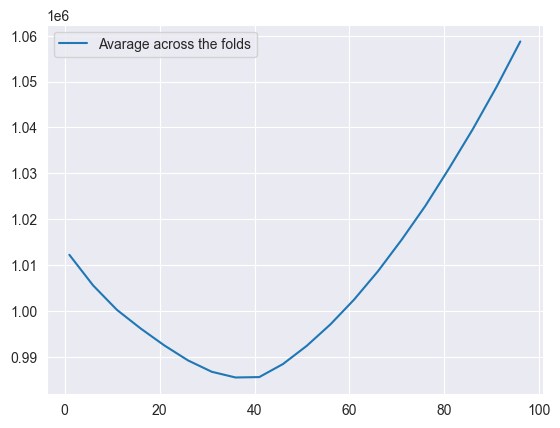

In [9]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso


alphas = np.arange(1, 100, 5)
model_lasso = LassoCV(alphas=alphas).fit(X, y)

plt.plot(model_lasso.alphas_, model_lasso.mse_path_.mean(axis=1),
         label="Avarage across the folds")
plt.grid(True)
plt.legend(loc="upper left")
print("alpha = ", model_lasso.alpha_)
regrL = Lasso(alpha=model_lasso.alpha_)
regrL.fit(X, y)
weights = regrL.coef_
print("\nFeature:   Weight: ")
for feature, coeff in zip(df.columns, regrL.coef_.T):
    print(feature, coeff)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Вычисляем прогнозы модели
y_pred = model_lasso.predict(X)

# Вычисляем MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Вычисляем MAE
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Вычисляем R2
r2 = r2_score(y, y_pred)
print("Coefficient of Determination (R2):", r2)

Mean Squared Error (MSE): 763210.0761214428
Mean Absolute Error (MAE): 651.1137691046292
Coefficient of Determination (R2): 0.7963499331804571


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as TTS
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
model_forest1 = RandomForestRegressor()
print('Start training model')
model_forest1.fit(Xtrain,Ytrain)
print('Start predicting model')
Ypred=model_forest1.predict(Xtest)

Start training model
Start predicting model


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Вычисляем прогнозы модели
y_pred = model_forest1.predict(X)

# Вычисляем MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Вычисляем MAE
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Вычисляем R2
r2 = r2_score(y, y_pred)
print("Coefficient of Determination (R2):", r2)

Mean Squared Error (MSE): 212090.99342010941
Mean Absolute Error (MAE): 272.5912859097127
Coefficient of Determination (R2): 0.9434070037422361
